**Deep Learning Customer Churn**






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_excel("Churn_Modelling.xlsx")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)


In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# ***Target Column***

## Exited

In [9]:
df['Exited'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [10]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

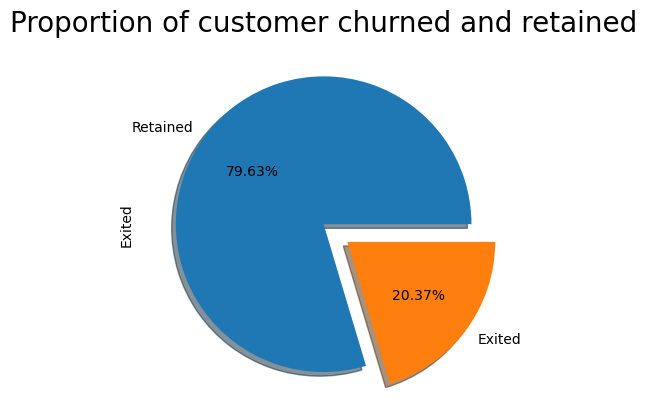

In [11]:

df['Exited'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['Retained','Exited'],explode=[0,0.2],shadow=True)
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# **Categorical Features**

In [12]:
#function is created to explore Feature of datatype=Object

def feature_info(feature):
    print(df[feature].value_counts())
    print('\n')
    print(df.groupby(feature)['Exited'].value_counts(normalize=True)*100)
    
    ax=sns.countplot(data=df,x=feature,hue='Exited')
    plt.title(f"{feature} wise numbers of customer churned and retained",size = 20)
    plt.legend(labels=['0 : Reatained','1 : Churned'])
    for container in ax.containers:
        ax.bar_label(container)
        
    return feature

## **Geography**

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

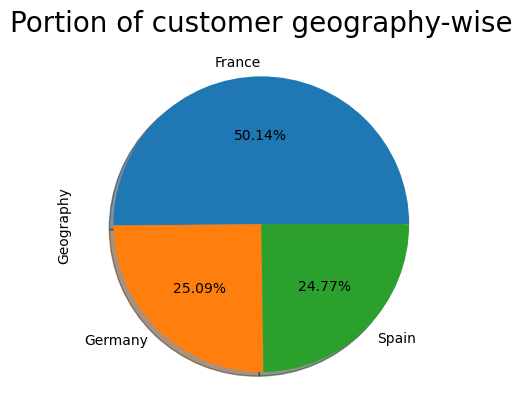

In [14]:
df['Geography'].value_counts().plot(kind='pie',autopct="%1.2f%%",shadow=True)
plt.title("Portion of customer geography-wise", size = 20)
plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64


'Geography'

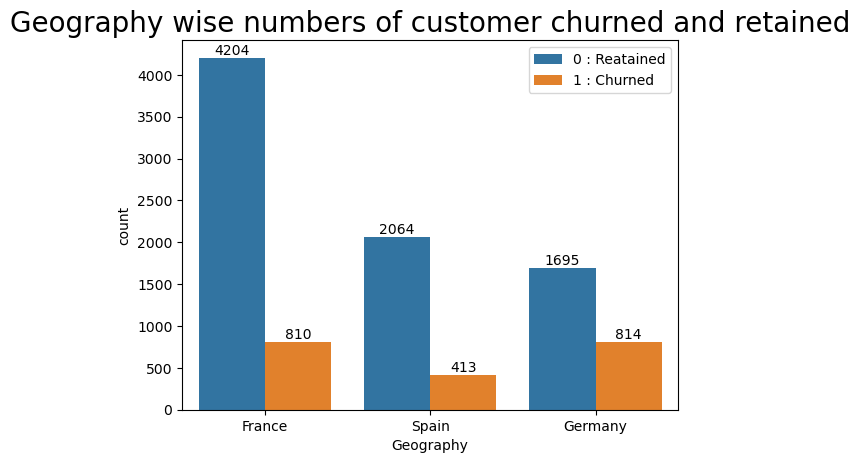

In [15]:
feature_info("Geography")

## **Gender**

In [16]:
df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

Male      5457
Female    4543
Name: Gender, dtype: int64


Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64


'Gender'

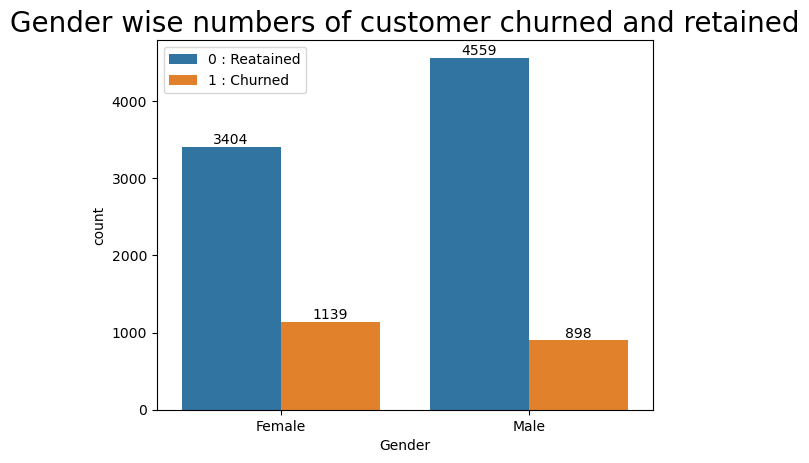

In [17]:
feature_info('Gender')

## Number of **Product**

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


NumOfProducts  Exited
1              0          72.285602
               1          27.714398
2              0          92.418301
               1           7.581699
3              1          82.706767
               0          17.293233
4              1         100.000000
Name: Exited, dtype: float64


'NumOfProducts'

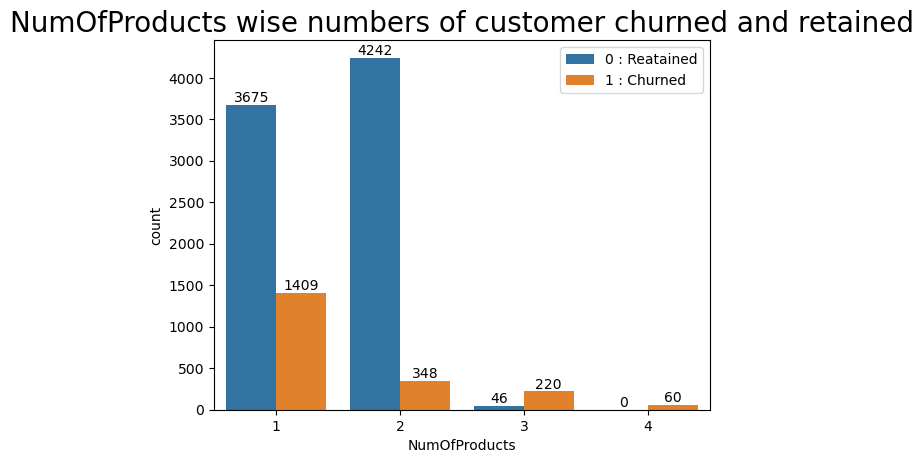

In [18]:
feature_info('NumOfProducts')

## **Has Credit Card or Not**
0: No Credit Card

1: Has Credit Card



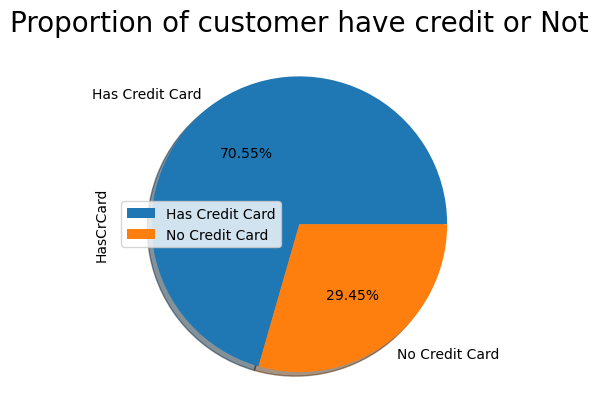

In [19]:
df['HasCrCard'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['Has Credit Card','No Credit Card'],shadow=True)
plt.title("Proportion of customer have credit or Not", size = 20)
plt.legend()
plt.show()

1    7055
0    2945
Name: HasCrCard, dtype: int64


HasCrCard  Exited
0          0         79.185059
           1         20.814941
1          0         79.815734
           1         20.184266
Name: Exited, dtype: float64


'HasCrCard'

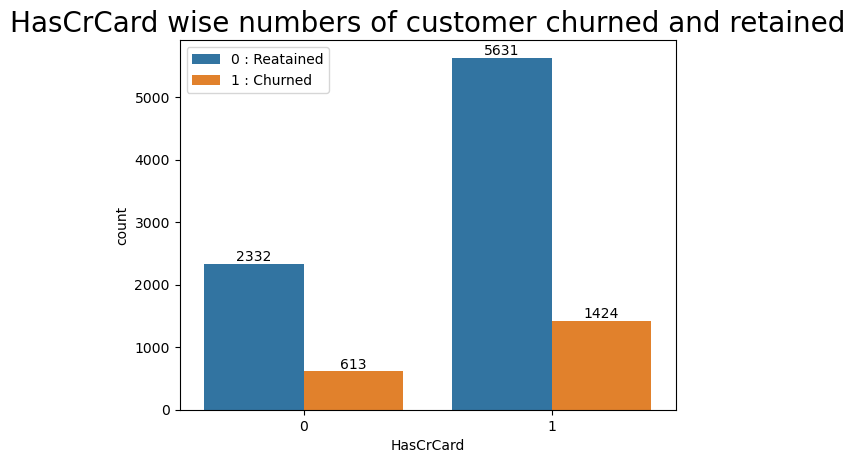

In [20]:
feature_info('HasCrCard')

## **Tenure**

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


Tenure  Exited
0       0         76.997579
        1         23.002421
1       0         77.584541
        1         22.415459
2       0         80.820611
        1         19.179389
3       0         78.889990
        1         21.110010
4       0         79.474216
        1         20.525784
5       0         79.347826
        1         20.652174
6       0         79.731127
        1         20.268873
7       0         82.782101
        1         17.217899
8       0         80.780488
        1         19.219512
9       0         78.353659
        1         21.646341
10      0         79.387755
        1         20.612245
Name: Exited, dtype: float64


'Tenure'

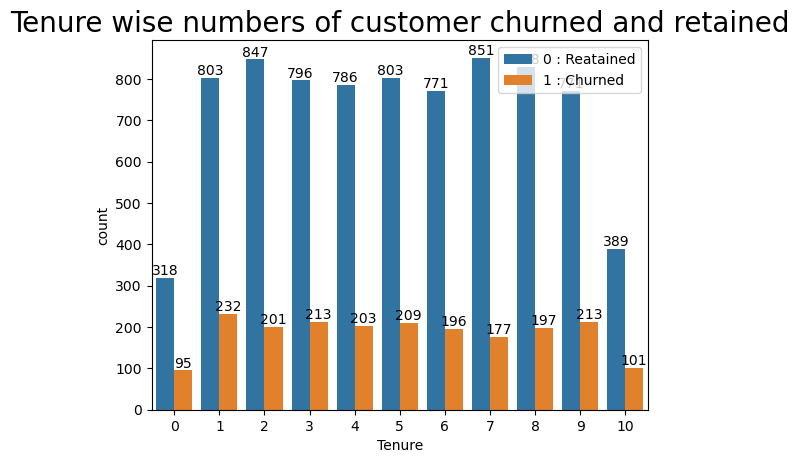

In [21]:
feature_info('Tenure')

## **Customer Active Or Not**

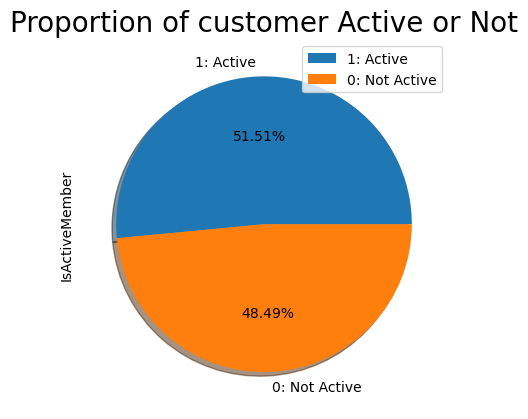

In [22]:
df['IsActiveMember'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['1: Active','0: Not Active'],shadow=True)
plt.title("Proportion of customer Active or Not", size = 20)
plt.legend()
plt.show()

1    5151
0    4849
Name: IsActiveMember, dtype: int64


IsActiveMember  Exited
0               0         73.149103
                1         26.850897
1               0         85.730926
                1         14.269074
Name: Exited, dtype: float64


'IsActiveMember'

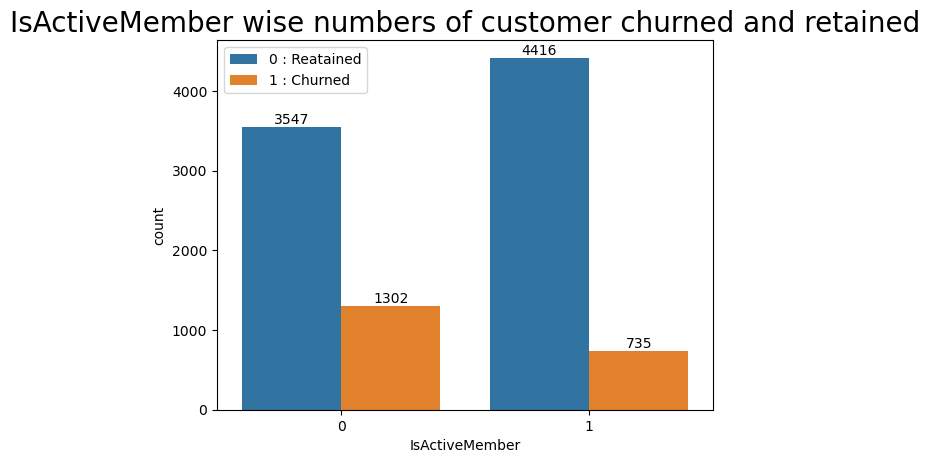

In [23]:
feature_info('IsActiveMember')

# **Numerical Feature**

In [24]:
def Num_feature(feature):
    print(df[feature].describe())
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    sns.scatterplot(x=df[feature], y=df['Exited'],hue=df['Exited'],ax=axes[0][0])
    axes[0][0].set_title((f'Scatter plot {feature} VS Customer Churn'))
    sns.boxplot(y=df[feature],x=df['Exited'],ax=axes[0][1])
    axes[0][1].set_title((f'Distribution of {feature} VS Customer Churn'))
  #axes[0][1].legend(labels=['0 : Reatained','1 : Churned'],loc='center')

    sns.distplot(x=df[feature],kde=True,ax=axes[1][0])
    axes[1][0].set_title((f'Distribution of {feature}'))
                    
    sns.boxplot(y=df[feature],ax=axes[1][1])
    axes[1][1].set_title((f'Distribution of {feature} using boxPlot'))                     
    fig.subplots_adjust(wspace=0.2,hspace=0.3,)

## **Age**

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


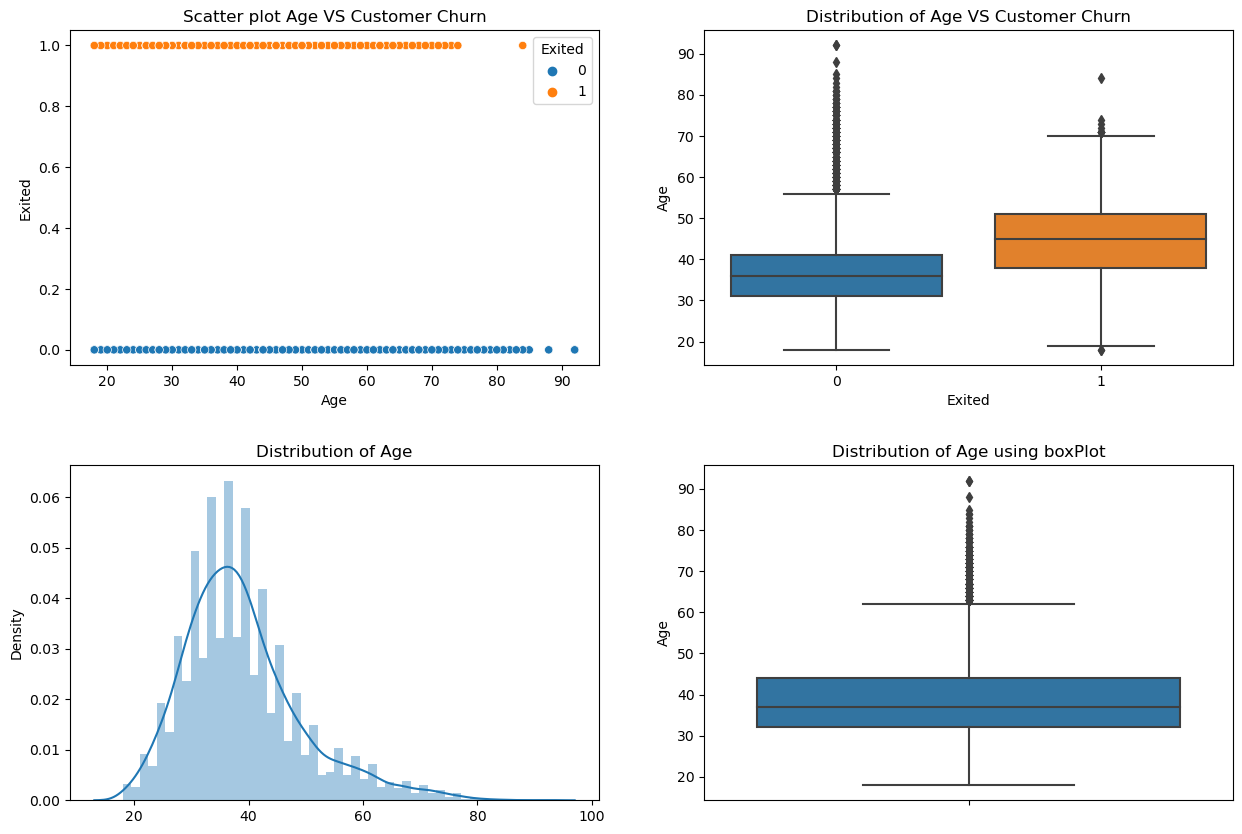

In [25]:
Num_feature('Age')

## **Credit Score**

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


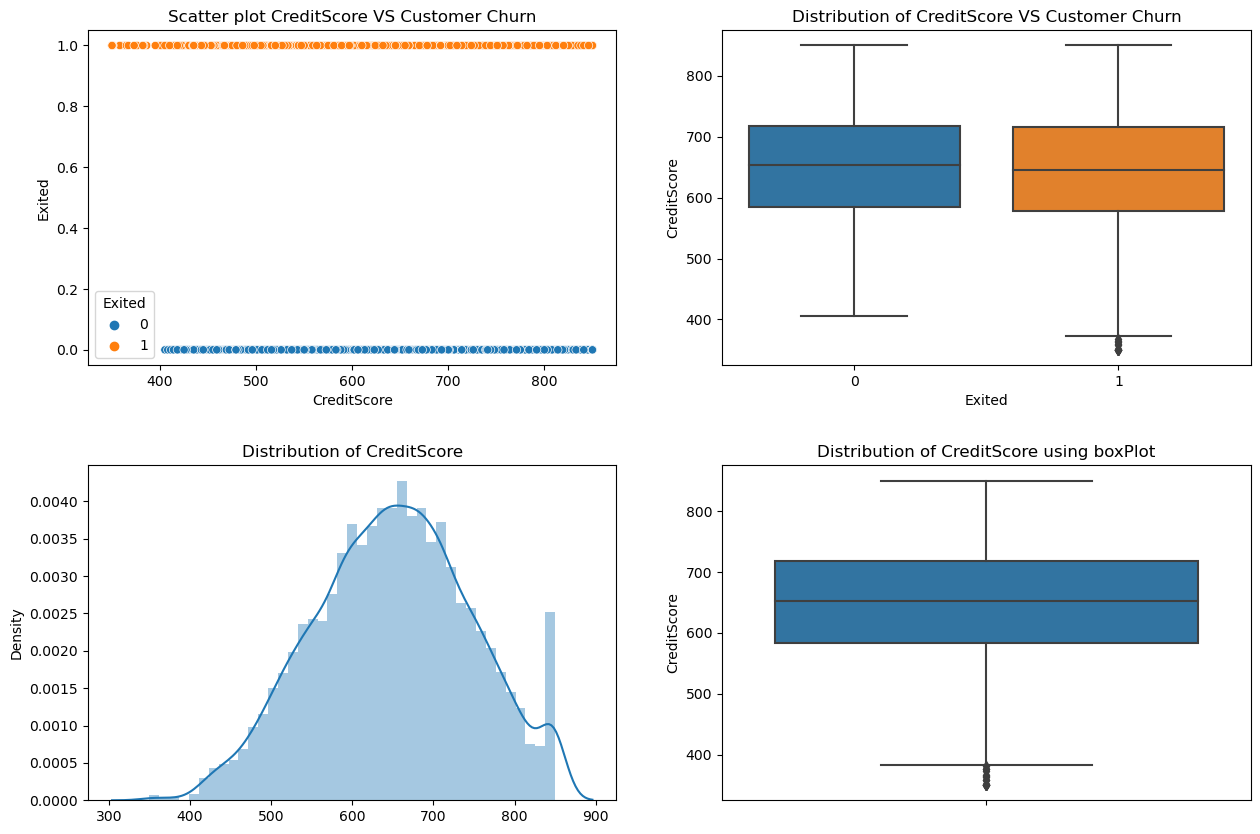

In [26]:
Num_feature('CreditScore')

## **Balance** 

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


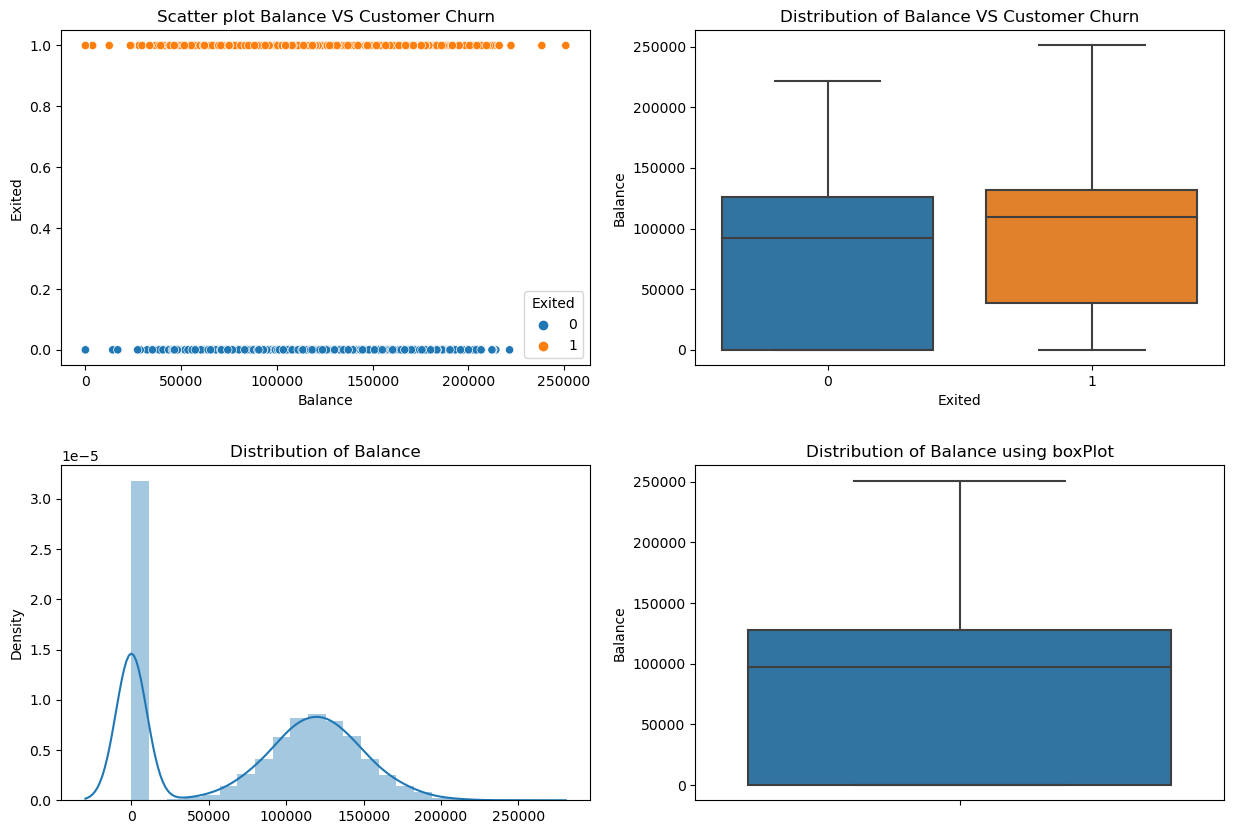

In [27]:
Num_feature('Balance')

**EstimatedSalary**





count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


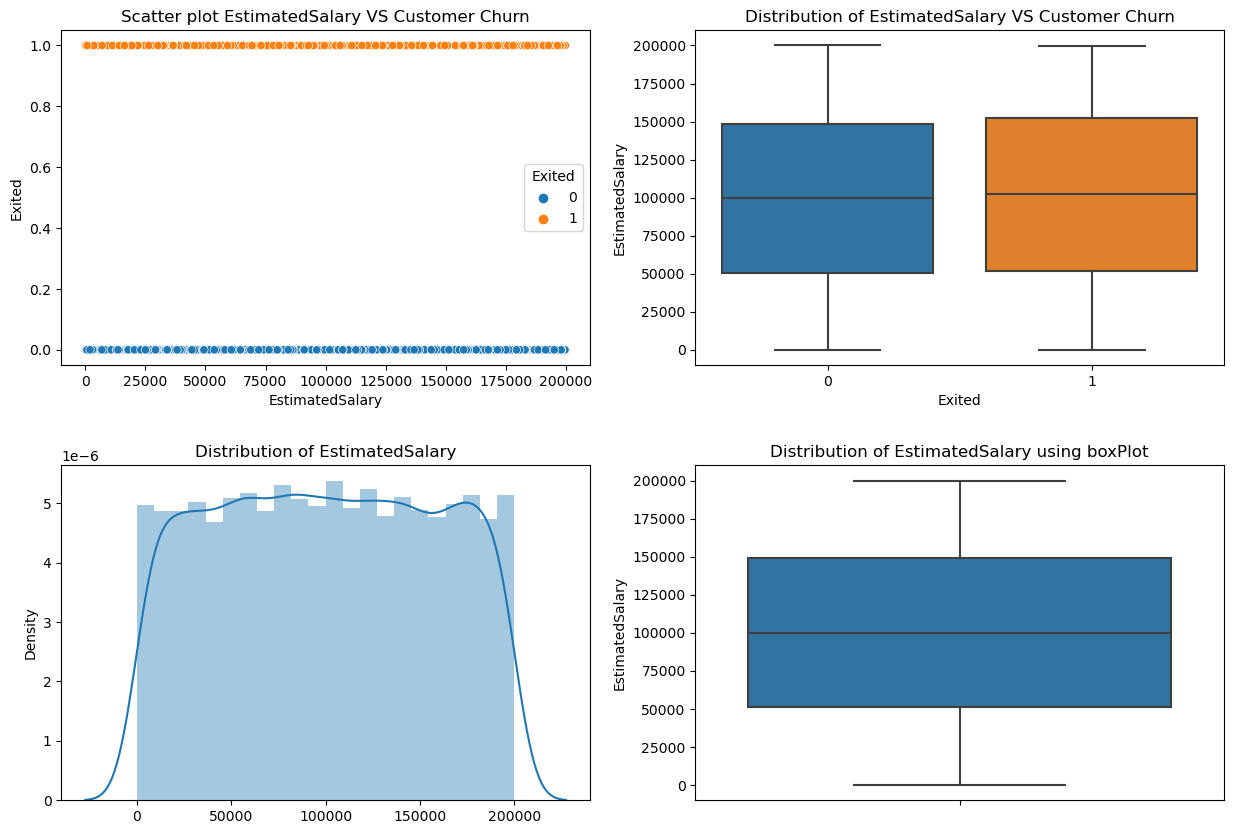

In [28]:
Num_feature('EstimatedSalary')

# **Correlation**

<Axes: >

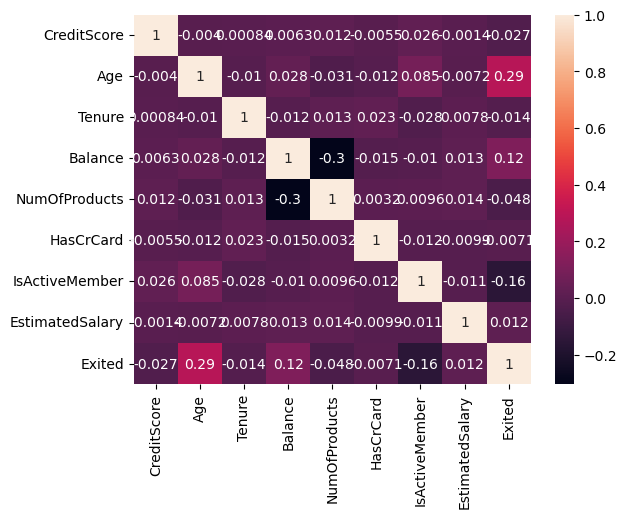

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

<Axes: >

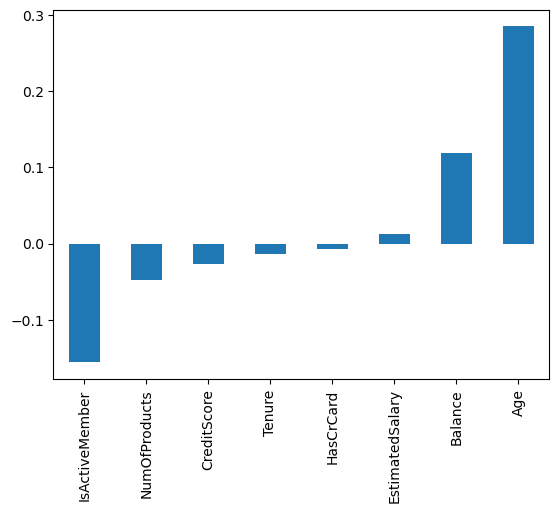

In [31]:
df.corr()['Exited'][:-1].sort_values().plot(kind='bar')

# **Encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Geography"]=le.fit_transform(df["Geography"])
le1=LabelEncoder()
df["Gender"]=le1.fit_transform(df["Gender"])


In [33]:
x=df.drop('Exited',axis=1)
y=df['Exited'].values

# **Scaling** 

In [34]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

In [35]:
x=std.fit_transform(x)
x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# **Train Test Split**

In [36]:
!pip install keras-tuner  

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)


In [38]:
import tensorflow as tf 
import kerastuner as kt 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report,confusion_matrix


In [39]:

ann=Sequential()
ann.add(Dense(units=20,activation="relu")) 
#hp_units = hp.Int('units',min_val=1,max_value=20,step=2)
ann.add(Dense(units=20,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

In [40]:
ann.compile(optimizer="adam",loss="binary_crossentropy")

In [41]:
ann.fit(xtrain,ytrain,epochs=200,batch_size=32,validation_data=(xtest, ytest))

Epoch 1/200
219/219 [==============================] - 3s 6ms/step - loss: 0.5338 - val_loss: 0.4495
Epoch 2/200
219/219 [==============================] - 1s 5ms/step - loss: 0.4417 - val_loss: 0.4109
Epoch 3/200
219/219 [==============================] - 1s 6ms/step - loss: 0.4134 - val_loss: 0.3886
Epoch 4/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3909 - val_loss: 0.3699
Epoch 5/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3741 - val_loss: 0.3544
Epoch 6/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3626 - val_loss: 0.3512
Epoch 7/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3561 - val_loss: 0.3458
Epoch 8/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3518 - val_loss: 0.3434
Epoch 9/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3487 - val_loss: 0.3423
Epoch 10/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3465 - val_lo

219/219 [==============================] - 1s 5ms/step - loss: 0.3117 - val_loss: 0.3422
Epoch 82/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3109 - val_loss: 0.3438
Epoch 83/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3108 - val_loss: 0.3428
Epoch 84/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3109 - val_loss: 0.3437
Epoch 85/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3104 - val_loss: 0.3445
Epoch 86/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3101 - val_loss: 0.3444
Epoch 87/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3104 - val_loss: 0.3425
Epoch 88/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3097 - val_loss: 0.3446
Epoch 89/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3098 - val_loss: 0.3458
Epoch 90/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3095 - val_loss: 

Epoch 161/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2979 - val_loss: 0.3575
Epoch 162/200
219/219 [==============================] - 1s 4ms/step - loss: 0.2982 - val_loss: 0.3545
Epoch 163/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2993 - val_loss: 0.3559
Epoch 164/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2984 - val_loss: 0.3569
Epoch 165/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2982 - val_loss: 0.3547
Epoch 166/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2983 - val_loss: 0.3551
Epoch 167/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2984 - val_loss: 0.3559
Epoch 168/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2976 - val_loss: 0.3541
Epoch 169/200
219/219 [==============================] - 1s 5ms/step - loss: 0.2977 - val_loss: 0.3581
Epoch 170/200
219/219 [==============================] - 1s 5ms/step - lo

In [42]:
#ann.history.history

In [43]:
model_loss = pd.DataFrame(ann.history.history)
model_loss.head()

,loss,val_loss
0,0.533832,0.449512
1,0.441725,0.410914
2,0.413374,0.388643
3,0.390891,0.369925
4,0.374080,0.354351


<Axes: >

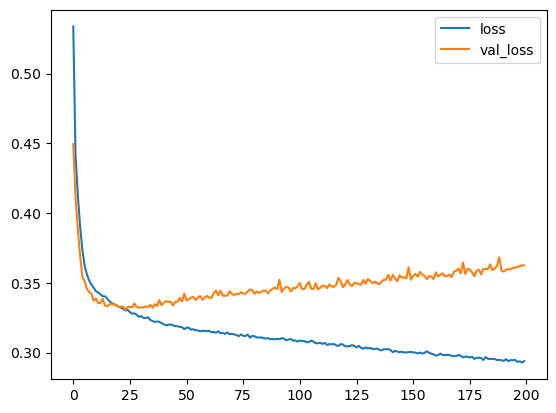

In [44]:
model_loss.plot()

In [45]:
ypred=ann.predict(xtest)


94/94 [==============================] - 0s 3ms/step


In [46]:
ypred


array([[0.00120668],
       [0.04418848],
       [0.01039983],
       ...,
       [0.4143902 ],
       [0.3913263 ],
       [0.00398203]], dtype=float32)

In [47]:
ypred=np.where(ypred>0.5,1,0)
ypred


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [48]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2389
           1       0.68      0.50      0.58       611

    accuracy                           0.85      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [49]:
print(confusion_matrix(ytest,ypred))

[[2244  145]
 [ 305  306]]




# **Early Stopping**



In [50]:
ann=Sequential()
ann.add(Dense(units=20,activation="relu")) 
ann.add(Dense(units=20,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [54]:
ann.fit(xtrain,ytrain,epochs=200,batch_size=32,validation_data=(xtest, ytest),callbacks=[early_stop])

Epoch 1/200
219/219 [==============================] - 2s 5ms/step - loss: 0.5137 - accuracy: 0.7736 - val_loss: 0.4282 - val_accuracy: 0.8110
Epoch 2/200
219/219 [==============================] - 1s 6ms/step - loss: 0.4290 - accuracy: 0.8190 - val_loss: 0.4025 - val_accuracy: 0.8337
Epoch 3/200
219/219 [==============================] - 1s 5ms/step - loss: 0.4042 - accuracy: 0.8363 - val_loss: 0.3810 - val_accuracy: 0.8477
Epoch 4/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3838 - accuracy: 0.8469 - val_loss: 0.3658 - val_accuracy: 0.8523
Epoch 5/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3704 - accuracy: 0.8491 - val_loss: 0.3560 - val_accuracy: 0.8547
Epoch 6/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3615 - accuracy: 0.8517 - val_loss: 0.3506 - val_accuracy: 0.8597
Epoch 7/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3554 - accuracy: 0.8541 - val_loss: 0.3479 - val_accuracy: 0.8570

In [55]:
#help(ann.fit)

In [56]:
model_loss = pd.DataFrame(ann.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.513701,0.773571,0.428222,0.811000
1,0.429015,0.819000,0.402510,0.833667
2,0.404202,0.836286,0.380962,0.847667
3,0.383819,0.846857,0.365847,0.852333
4,0.370402,0.849143,0.356029,0.854667


<Axes: >

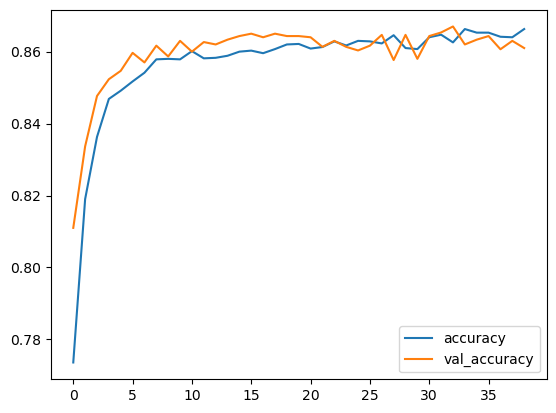

In [57]:
model_loss[['accuracy','val_accuracy']].plot()

<Axes: >

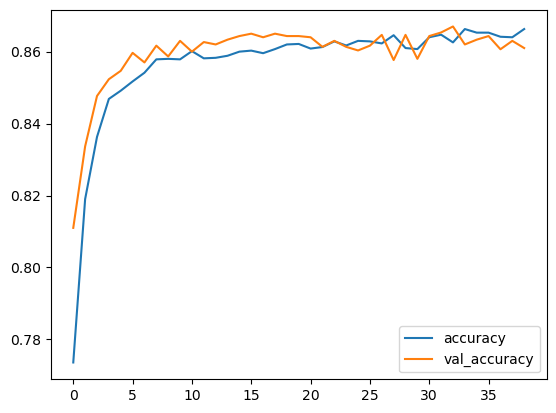

In [58]:
model_loss[['accuracy','val_accuracy']].plot()

In [59]:
predictions = ann.predict(xtest)

94/94 [==============================] - 0s 3ms/step


In [60]:
predictions

array([[0.0029766 ],
       [0.10132586],
       [0.02509009],
       ...,
       [0.31029266],
       [0.35057023],
       [0.01780498]], dtype=float32)

# **Adding in DropOut Layers**

In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
ann=Sequential()
ann.add(Dense(units=20,activation="relu")) 
ann.add((Dropout(0.5)))

ann.add(Dense(units=20,activation="relu"))
ann.add((Dropout(0.5)))

ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [63]:
ann.fit(xtrain,ytrain,epochs=200,batch_size=32,validation_data=(xtest, ytest),callbacks=[early_stop])

Epoch 1/200
219/219 [==============================] - 3s 6ms/step - loss: 0.5908 - accuracy: 0.7341 - val_loss: 0.4791 - val_accuracy: 0.7963
Epoch 2/200
219/219 [==============================] - 1s 4ms/step - loss: 0.5204 - accuracy: 0.7856 - val_loss: 0.4561 - val_accuracy: 0.7963
Epoch 3/200
219/219 [==============================] - 1s 6ms/step - loss: 0.4997 - accuracy: 0.7920 - val_loss: 0.4422 - val_accuracy: 0.7963
Epoch 4/200
219/219 [==============================] - 1s 6ms/step - loss: 0.4844 - accuracy: 0.7991 - val_loss: 0.4339 - val_accuracy: 0.7973
Epoch 5/200
219/219 [==============================] - 1s 6ms/step - loss: 0.4742 - accuracy: 0.8034 - val_loss: 0.4232 - val_accuracy: 0.8017
Epoch 6/200
219/219 [==============================] - 1s 4ms/step - loss: 0.4613 - accuracy: 0.8033 - val_loss: 0.4161 - val_accuracy: 0.8007
Epoch 7/200
219/219 [==============================] - 1s 5ms/step - loss: 0.4541 - accuracy: 0.8073 - val_loss: 0.4097 - val_accuracy: 0.8120

Epoch 58/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8353 - val_loss: 0.3443 - val_accuracy: 0.8687
Epoch 59/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3851 - accuracy: 0.8411 - val_loss: 0.3434 - val_accuracy: 0.8673
Epoch 60/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8377 - val_loss: 0.3430 - val_accuracy: 0.8640
Epoch 61/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8383 - val_loss: 0.3453 - val_accuracy: 0.8647
Epoch 62/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8341 - val_loss: 0.3414 - val_accuracy: 0.8660
Epoch 63/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3956 - accuracy: 0.8339 - val_loss: 0.3452 - val_accuracy: 0.8677
Epoch 64/200
219/219 [==============================] - 1s 4ms/step - loss: 0.3898 - accuracy: 0.8346 - val_loss: 0.3453 - val_accuracy:

Epoch 115/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3830 - accuracy: 0.8383 - val_loss: 0.3427 - val_accuracy: 0.8640
Epoch 116/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3874 - accuracy: 0.8356 - val_loss: 0.3424 - val_accuracy: 0.8630
Epoch 117/200
219/219 [==============================] - 1s 6ms/step - loss: 0.3840 - accuracy: 0.8397 - val_loss: 0.3437 - val_accuracy: 0.8627
Epoch 118/200
219/219 [==============================] - 1s 5ms/step - loss: 0.3874 - accuracy: 0.8356 - val_loss: 0.3431 - val_accuracy: 0.8643
Epoch 119/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3882 - accuracy: 0.8319 - val_loss: 0.3423 - val_accuracy: 0.8653
Epoch 120/200
219/219 [==============================] - 1s 3ms/step - loss: 0.3841 - accuracy: 0.8369 - val_loss: 0.3449 - val_accuracy: 0.8620
Epoch 121/200
219/219 [==============================] - 1s 2ms/step - loss: 0.3869 - accuracy: 0.8380 - val_loss: 0.3457 - val_ac

In [64]:
model_loss = pd.DataFrame(ann.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.590802,0.734143,0.479119,0.796333
1,0.520366,0.785571,0.456081,0.796333
2,0.499668,0.792000,0.442220,0.796333
3,0.484405,0.799143,0.433898,0.797333
4,0.474176,0.803429,0.423240,0.801667


<Axes: >

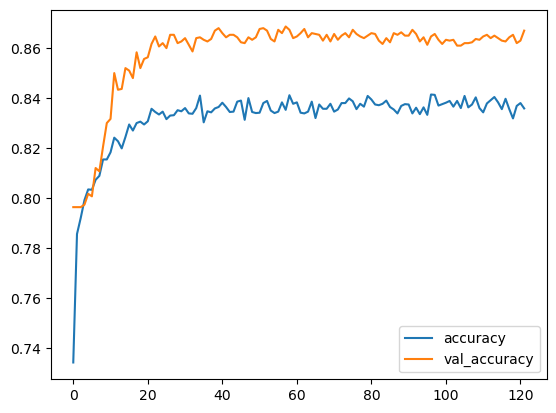

In [65]:
model_loss[['accuracy','val_accuracy']].plot()

# Keras Tuner

In [66]:
def model_builder(hp):
    ann=Sequential()
    ann.add(Dense(units=20,activation="relu")) 
    hp_units = hp.Int('units',min_value=1,max_value=20,step=2)
    ann.add(Dense(units=hp_units,activation='relu'))
    ann.add(Dense(units=20,activation="relu"))
    ann.add(Dense(units=1,activation="sigmoid"))
    ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    return ann

In [67]:
tuner= kt.Hyperband(model_builder,
                   objective='val_accuracy',
                   max_epochs=10,
                   factor=3,
                   directory='my_dir')

In [68]:
tuner.search(xtrain,ytrain,epochs=50,validation_split=0.2)

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.824999988079071

Best val_accuracy So Far: 0.8257142901420593
Total elapsed time: 00h 57m 22s
INFO:tensorflow:Oracle triggered exit
